In [1]:
import cv2
import os
import glob
from matplotlib import pyplot as plt

In [2]:
# Define image paths and directories
img_dir = "img/"
formats = ["jpg", "png", "tiff"]
output_dirs = {fmt: os.path.join(img_dir, fmt) for fmt in formats}
result_dirs = {fmt: os.path.join(output_dirs[fmt], "result") for fmt in formats}

In [3]:
# Ensure output and result directories exist
for dir_path in output_dirs.values():
    os.makedirs(dir_path, exist_ok=True)
for dir_path in result_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

In [4]:
# Find all images in each format directory
all_images = {}
for fmt in formats:
    # Look for all images of this format in the format directory
    pattern = os.path.join(output_dirs[fmt], f"*.{fmt}")
    images_found = glob.glob(pattern)

    # Also check the main directory
    main_pattern = os.path.join(img_dir, f"*.{fmt}")
    main_images = glob.glob(main_pattern)

    # Combine the results
    all_format_images = images_found + main_images

    if all_format_images:
        all_images[fmt] = all_format_images
        print(
            f"Found {len(all_format_images)} {fmt} images: {[os.path.basename(img) for img in all_format_images]}"
        )
    else:
        print(f"No {fmt} images found")

Found 1 jpg images: ['mount.jpg']
Found 1 png images: ['kanagawa.png']
Found 1 tiff images: ['ghibli.tiff']


Processing mount.jpg...
  Converting to RGB and grayscale in original format (jpg)


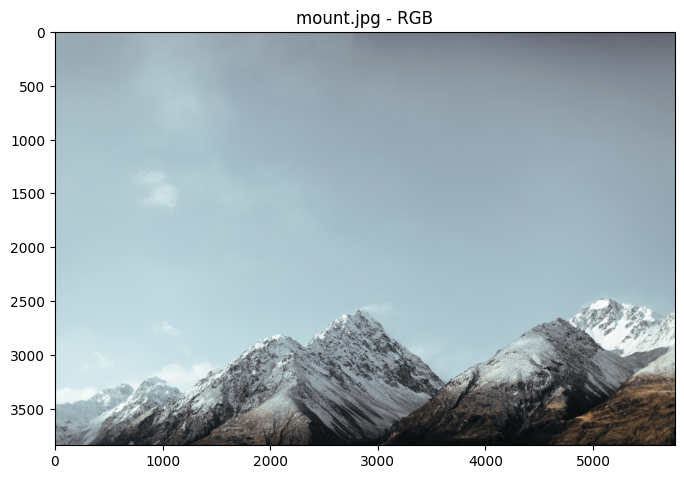

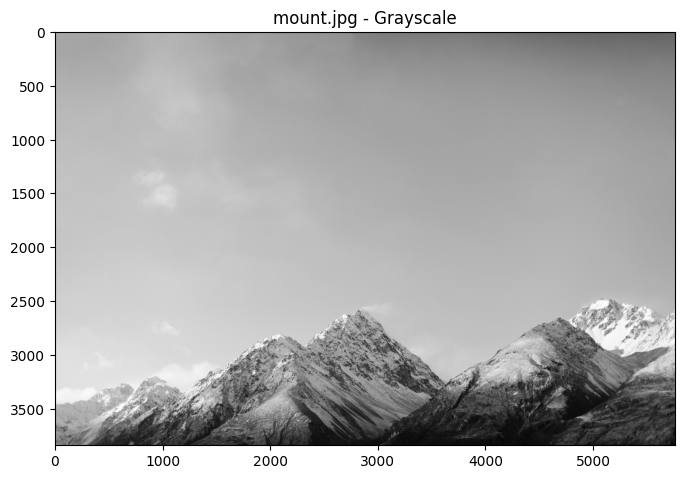

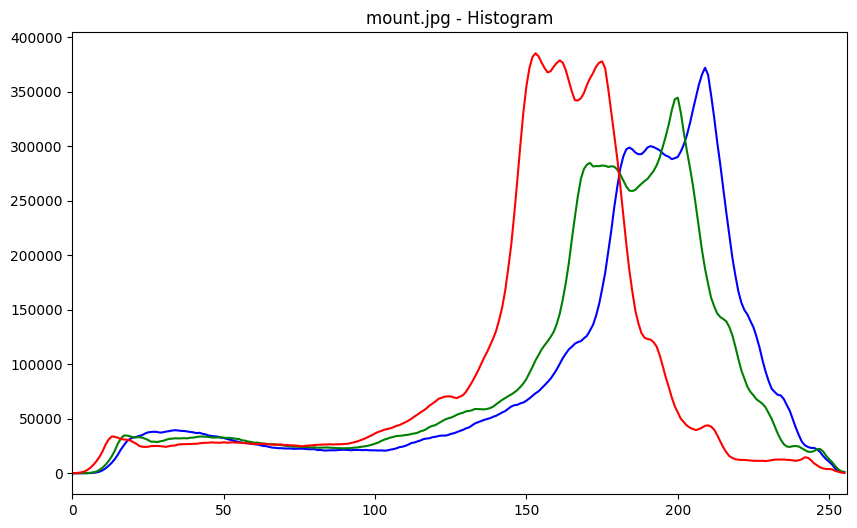

  Converting to png format
  Converting to tiff format
Processing kanagawa.png...
  Converting to RGB and grayscale in original format (png)


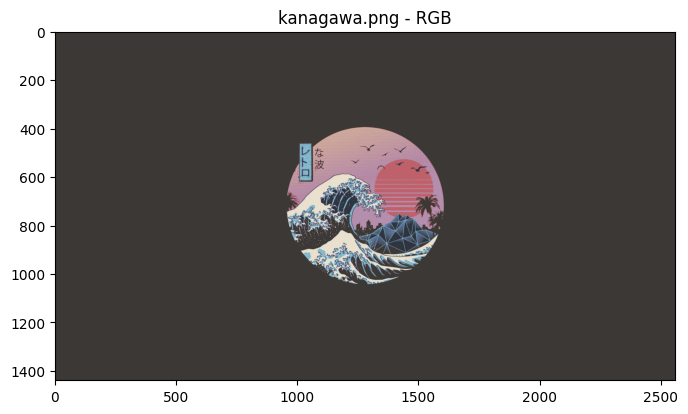

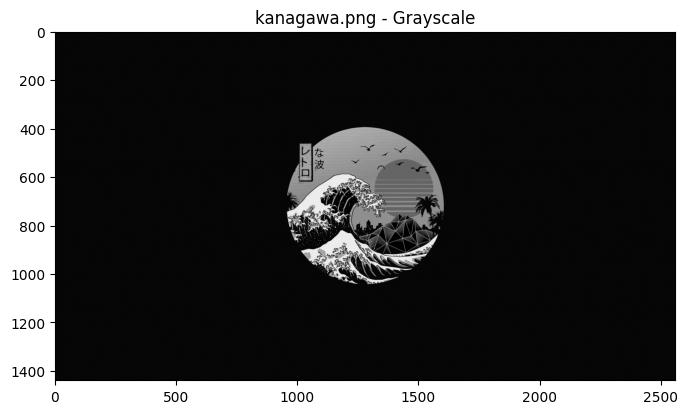

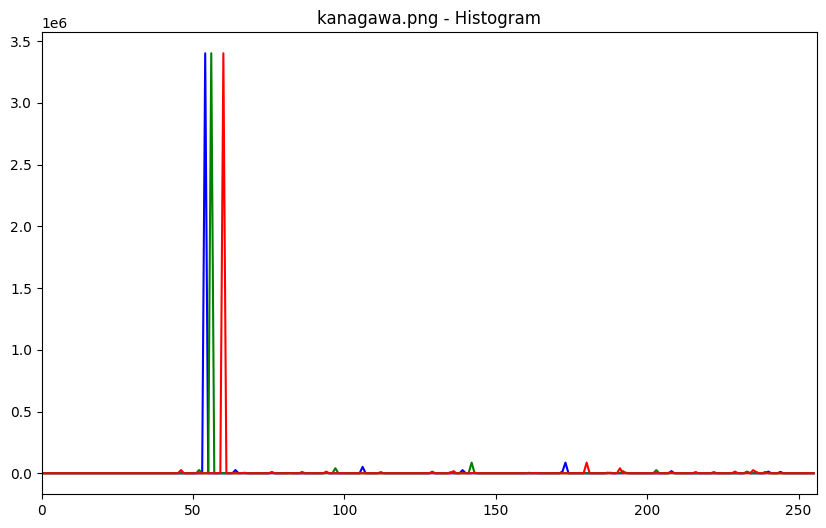

  Converting to jpg format
  Converting to tiff format
Processing ghibli.tiff...
  Converting to RGB and grayscale in original format (tiff)


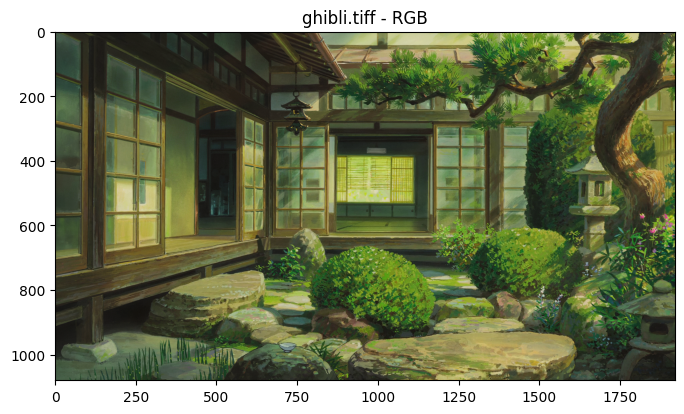

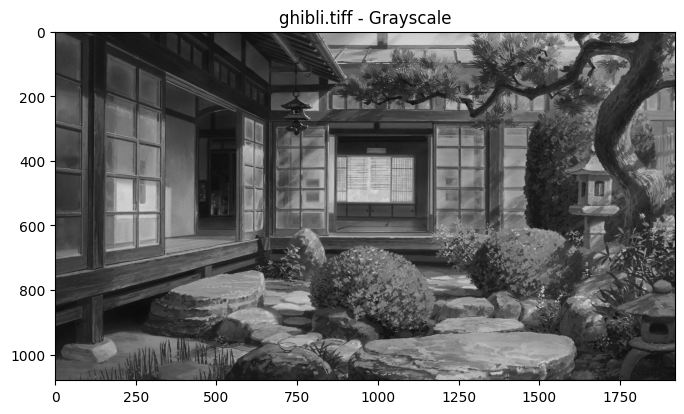

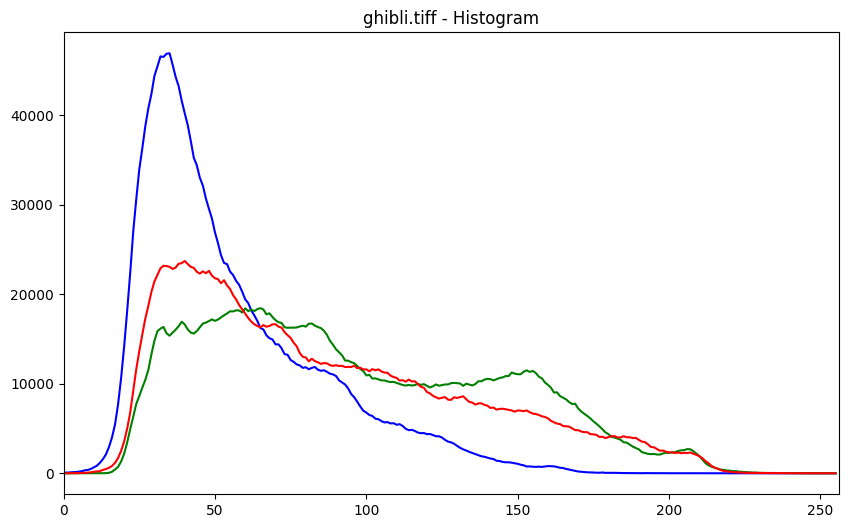

  Converting to jpg format
  Converting to png format


In [5]:
# Process each image format
for src_fmt, image_paths in all_images.items():
    for img_path in image_paths:
        img_basename = os.path.basename(img_path)
        filename_without_ext = os.path.splitext(img_basename)[0]

        print(f"Processing {img_basename}...")

        # Read the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read {img_path}")
            continue

        # Process original format first
        print(f"  Converting to RGB and grayscale in original format ({src_fmt})")

        # RGB conversion
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb_path = os.path.join(
            result_dirs[src_fmt], f"{filename_without_ext}_rgb.{src_fmt}"
        )
        cv2.imwrite(rgb_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

        # Grayscale conversion
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_path = os.path.join(
            result_dirs[src_fmt], f"{filename_without_ext}_gray.{src_fmt}"
        )
        cv2.imwrite(gray_path, img_gray)

        # Display RGB image
        plt.figure(figsize=(8, 6))
        plt.imshow(img_rgb)
        plt.title(f"{img_basename} - RGB")
        plt.show()
        plt.close()

        # Display grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(img_gray, cmap="gray")
        plt.title(f"{img_basename} - Grayscale")
        plt.show()
        plt.close()

        # Display histogram (without saving)
        plt.figure(figsize=(10, 6))
        color = ("b", "g", "r")
        for i, col in enumerate(color):
            histr = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(histr, color=col)
        plt.xlim([0, 256])
        plt.title(f"{img_basename} - Histogram")
        plt.show()
        plt.close()

        # Convert to other formats
        for dst_fmt in formats:
            if dst_fmt != src_fmt:
                print(f"  Converting to {dst_fmt} format")

                # Save in destination format - RGB
                dst_rgb_path = os.path.join(
                    result_dirs[dst_fmt], f"{filename_without_ext}_rgb.{dst_fmt}"
                )
                cv2.imwrite(dst_rgb_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

                # Save in destination format - Grayscale
                dst_gray_path = os.path.join(
                    result_dirs[dst_fmt], f"{filename_without_ext}_gray.{dst_fmt}"
                )
                cv2.imwrite(dst_gray_path, img_gray)

In [6]:
print("Processing completed!")

Processing completed!
